In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [24]:
df=pd.read_excel('datasetitcs.xlsx')
df.head(-5)

COURSE  SEMESTER 1 (%)  SEMESTER 2 (%)  FIRST YEAR PERCENTAGE(100)  \
0       IT         60.7900         60.7900                     60.7900   
1       IT         60.1660         63.2060                     61.6860   
2       IT         74.1100         71.5300                     72.8200   
3       IT         62.2400         65.8980                     64.0690   
4       IT         68.9180         71.6660                     70.2920   
..     ...             ...             ...                         ...   
97      CS         71.1184         56.6800                     63.8992   
98      CS         70.0210         55.6740                     62.8475   
99      CS         71.2444         48.9804                     60.1124   
100     CS         56.9260         58.1560                     57.5410   
101     CS         71.4600         59.2504                     65.3552   

     FIRST YEAR PERCENTAGE(10)  
0                      6.07900  
1                      6.16860  
2                      7.28200  
3                      6.40690  
4                      7.02920  
..                         ...  
97                     6.38992  
98                     6.28475  
99                     6.01124  
100                    5.75410  
101                    6.53552  

[102 rows x 5 columns]

In [25]:
df.isnull().sum()

COURSE                        0
SEMESTER 1 (%)                0
SEMESTER 2 (%)                0
FIRST YEAR PERCENTAGE(100)    0
FIRST YEAR PERCENTAGE(10)     0
dtype: int64

In [26]:
df.drop(['FIRST YEAR PERCENTAGE(100)'], axis=1, inplace=True)
df.head()

COURSE  SEMESTER 1 (%)  SEMESTER 2 (%)  FIRST YEAR PERCENTAGE(10)
0     IT          60.790          60.790                     6.0790
1     IT          60.166          63.206                     6.1686
2     IT          74.110          71.530                     7.2820
3     IT          62.240          65.898                     6.4069
4     IT          68.918          71.666                     7.0292

In [27]:
df.shape

(107, 4)

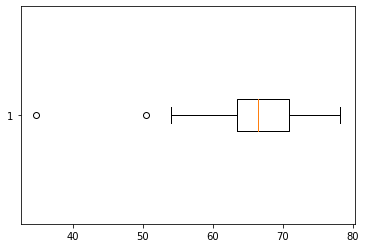

In [39]:
#OUTLIER
plt.boxplot(df['SEMESTER 1 (%)'],vert=False)
plt.show()

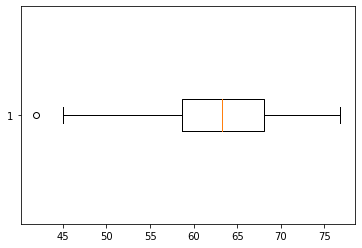

In [38]:
#OUTLIER
plt.boxplot(df['SEMESTER 2 (%)'],vert=False)
plt.show()

In [29]:
X=df[['SEMESTER 1 (%)','SEMESTER 2 (%)']]
y=df['FIRST YEAR PERCENTAGE(10)']

In [30]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.5)

In [31]:
model1=LinearRegression()
model1.fit(x_train, y_train)
ypred = model1.predict(x_test)

In [32]:
model1.score(x_test, y_test)

1.0

In [33]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,ypred)
MSE

1.811458374951953e-30

In [34]:
model1.predict([[60.790,60.790]])

array([6.079])

In [35]:
pickle.dump(model1, open('model.pkl', 'wb'))

In [36]:
pickled_model1 = pickle.load(open('model.pkl', 'rb'))
pickled_model1.predict([[50.5, 60]])

array([5.525])